In [1]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

# Load the .txt file
# Construct the file path
train_path = os.path.join(rpath, 'data', 'merged_train_data.csv')
train_data = pd.read_csv(train_path)  # Tab-delimited

train_data.head()

C:\Users\AII\AppData\Local\Temp\ipykernel_5532\3490458446.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path)  # Tab-delimited


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,unknown
1,2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,unknown
4,2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,unknown


In [2]:
test_data = os.path.join(rpath, 'data', 'merged_test_data.csv')
test_data = pd.read_csv(test_data)  # Tab-delimited

test_data.head()

C:\Users\AII\AppData\Local\Temp\ipykernel_5532\369015305.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_data)  # Tab-delimited


,Date,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-09-17,1,1,4,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,unknown
1,2015-09-17,2,3,4,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,2015-09-17,3,7,4,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,unknown
3,2015-09-17,4,8,4,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,unknown
4,2015-09-17,5,9,4,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,unknown


In [3]:
train_data.isnull().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [4]:
test_data.isnull().sum()

Date                         0
Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**preprocessing**

In [4]:
merged_train_data = train_data.copy()
merged_train_data['Date'] = pd.to_datetime(merged_train_data['Date'],format='mixed')
merged_train_data['year'] = merged_train_data['Date'].dt.year
merged_train_data['month'] = merged_train_data['Date'].dt.month
merged_train_data['day'] = merged_train_data['Date'].dt.day
merged_train_data=merged_train_data.set_index('Date')
merged_train_data.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,6,5,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,7,5,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,8,5,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,unknown,2015,7,31
2015-07-31,9,5,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,unknown,2015,7,31


In [5]:
merged_test_data = test_data.copy()
merged_test_data['Date'] = pd.to_datetime(merged_test_data['Date'],format='mixed')
merged_test_data['year'] = merged_test_data['Date'].dt.year
merged_test_data['month'] = merged_test_data['Date'].dt.month
merged_test_data['day'] = merged_test_data['Date'].dt.day
merged_test_data=merged_test_data.set_index('Date')
merged_test_data.head(10)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
Date,,,,,,,,,,,,,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,unknown,2015,9,17
2015-09-17,2,3,4,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2015-09-17,3,7,4,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,unknown,2015,9,17
2015-09-17,4,8,4,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,unknown,2015,9,17
2015-09-17,5,9,4,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,unknown,2015,9,17
2015-09-17,6,10,4,1.0,1,0,0,a,a,3160.0,9.0,2009.0,0,0.0,0.0,unknown,2015,9,17
2015-09-17,7,11,4,1.0,1,0,0,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17
2015-09-17,8,12,4,1.0,1,0,0,a,c,1070.0,0.0,0.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,9,17
2015-09-17,9,13,4,1.0,1,0,0,d,a,310.0,0.0,0.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,9,17


**Random Forest**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Ensure categorical columns are of string type
merged_train_data['StateHoliday'] = merged_train_data['StateHoliday'].astype(str)
merged_train_data['StoreType'] = merged_train_data['StoreType'].astype(str)
merged_train_data['Assortment'] = merged_train_data['Assortment'].astype(str)

# Extract relevant features (adjust based on your columns)
X = merged_train_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'day']]
y = merged_train_data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
# Numerical features
num_features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
                'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'day']
num_transformer = StandardScaler()

# Categorical features
cat_features = ['StateHoliday', 'StoreType', 'Assortment']
cat_transformer = OrdinalEncoder()  # Use OrdinalEncoder for categorical features

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Define the pipeline with preprocessor and model (Random Forest as an example)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Absolute Error: 488.6764908917529
R2 Score: 0.9523528654356753


In [11]:
import math
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

# Print results
print("The model performance for test set:")
print('-' * 38)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

The model performance for test set:
--------------------------------------
MAE: 488.6764908917529
MSE: 704643.7612475369
R2: 0.9523528654356753
RMSE: 839.4306172921839


In [19]:
import numpy as np
import shap

# Sample a subset of the test set, e.g., 100 samples
n_samples = 100

# Transform the test set using the pipeline's preprocessing steps
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

indices = np.random.choice(X_test_transformed.shape[0], n_samples, replace=False)
X_test_sample = X_test_transformed[indices]

explainer = shap.TreeExplainer(pipeline.named_steps['model'])
# Calculate SHAP values on the sample
shap_values = explainer.shap_values(X_test_sample, check_additivity=False)


c:\Users\AII\Desktop\sales-forecasting\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
shap_values = explainer.shap_values(X_test_transformed, check_additivity=False, approximate=True)


In [8]:
import shap
shap.initjs()
# Initialize SHAP TreeExplainer without additivity check in the init
explainer = shap.TreeExplainer(pipeline.named_steps['model'])

# Transform the test set using the pipeline's preprocessing steps
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Calculate SHAP values with check_additivity disabled
shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)


c:\Users\AII\Desktop\sales-forecasting\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test_transformed)

In [ ]:
# Assuming you have already calculated shap_values
import matplotlib.pyplot as plt

# Static force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test_transformed[0], matplotlib=True)
plt.show()

# Or use a summary plot (better for Colab)
shap.summary_plot(shap_values, X_test_transformed)


In [ ]:
import numpy as np

def bootstrap_predictions(model, X, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        # Sample with replacement
        X_sample = X[np.random.choice(X.shape[0], size=X.shape[0], replace=True)]
        preds = model.predict(X_sample)
        predictions.append(preds)
    return np.array(predictions)

# Get predictions for the test set
predictions = bootstrap_predictions(pipeline, X_test)

# Calculate mean and confidence intervals
mean_preds = predictions.mean(axis=0)
conf_interval_lower = np.percentile(predictions, 2.5, axis=0)
conf_interval_upper = np.percentile(predictions, 97.5, axis=0)

# Create a DataFrame for better visualization
confidence_intervals = pd.DataFrame({
    'Mean Prediction': mean_preds.flatten(),
    'Lower CI': conf_interval_lower.flatten(),
    'Upper CI': conf_interval_upper.flatten()
})

print(confidence_intervals)


In [ ]:
import matplotlib.pyplot as plt

# Plot Mean Prediction and Confidence Intervals
plt.figure(figsize=(10, 3))

# Plot mean prediction
plt.plot(confidence_intervals.index, confidence_intervals['Mean Prediction'], label='Mean Prediction', color='blue')

# Fill between lower and upper confidence intervals
plt.fill_between(confidence_intervals.index, 
                 confidence_intervals['Lower CI'], 
                 confidence_intervals['Upper CI'], 
                 color='gray', alpha=0.3, label='Confidence Interval')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Sales Prediction')
plt.title('Sales Prediction with Confidence Interval')
plt.legend()

# Show plot
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

merged_train_data['StateHoliday'] = merged_train_data['StateHoliday'].astype(str)
merged_train_data['StoreType'] = merged_train_data['StoreType'].astype(str)
merged_train_data['Assortment'] = merged_train_data['Assortment'].astype(str)

# Extract relevant features (you can adjust based on your columns)
X = merged_train_data[['Store','DayOfWeek','Open','Promo', 'StateHoliday', 'SchoolHoliday',
        'StoreType', 'Assortment', 'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
        'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'year', 'month', 'day']]
y = merged_train_data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:

# Preprocessing pipeline
# Numerical features
num_features = ['Store','DayOfWeek','Open','Promo', 'SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear','Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year', 'month', 'day']
num_transformer = StandardScaler()

# Categorical features
cat_features = ['StateHoliday','StoreType', 'Assortment']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Define the pipeline with preprocessor and model (Random Forest as an example)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
# Define the hyperparameters to tune
param_distributions = {
    'model__n_estimators': [20,30,50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [15, 20, 30, 40],  # Maximum depth of the tree
}

# Initialize RandomizedSearchCV
# Adjusting n_jobs to 1 to reduce memory load
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)

# Fit the model with fewer iterations (n_iter=10) and reduced parallelism (n_jobs=1)
random_search.fit(X_train, y_train)


# Best parameters from tuning
print(f'Best Parameters: {random_search.best_params_}')

# Make predictions using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ........model__max_depth=15, model__n_estimators=20; total time= 1.6min
[CV] END ........model__max_depth=15, model__n_estimators=20; total time= 1.5min
[CV] END ........model__max_depth=15, model__n_estimators=20; total time= 1.2min
[CV] END ........model__max_depth=40, model__n_estimators=50; total time= 4.7min
[CV] END ........model__max_depth=40, model__n_estimators=50; total time= 4.1min
[CV] END ........model__max_depth=40, model__n_estimators=50; total time= 4.1min
[CV] END ........model__max_depth=40, model__n_estimators=20; total time= 1.7min
[CV] END ........model__max_depth=40, model__n_estimators=20; total time= 1.7min
[CV] END ........model__max_depth=40, model__n_estimators=20; total time= 1.7min
[CV] END ........model__max_depth=15, model__n_estimators=30; total time= 1.7min
[CV] END ........model__max_depth=15, model__n_estimators=30; total time= 1.7min
[CV] END ........model__max_depth=15, model__n_e

In [191]:
import shap
# Initialize the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(best_model.named_steps['model'])  # The RandomForest model inside your pipeline
# Preprocess X_test using the preprocessing step of the pipeline
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
# Calculate SHAP values for X_test
shap_values = explainer.shap_values(X_test_transformed)
# Summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=num_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()))


c:\Users\AII\Desktop\sales-forecasting\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pickle
from datetime import datetime

# Assuming 'model' is your trained LSTM model

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Format the filename
filename = f'../models/model-{timestamp}.pkl'

# Save the model with pickle
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f'Model saved as {filename}')


In [ ]:
import pickle
# Load the saved model
with open('../models/model-23-09-2024-21-30-57-720764.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the model for prediction
predictions = loaded_model.predict(X_test)

### Deep Learning

1. Isolate the Rossmann Store Sales dataset into time series data   

In [ ]:
data = merged_train_data[['Customers','Open','Promo', 'StateHoliday', 'SchoolHoliday',
        'StoreType', 'Assortment', 'CompetitionDistance','Promo2','Sales']]
data.head()

In [9]:
import pandas as pd

# Assuming your data is in a DataFrame called merged_train_data

# Define the aggregation rules for each column
aggregation_rules = {
    'Store': 'first',  # Keep the first value (or you can choose 'mean' if necessary)
    'DayOfWeek': lambda x: x.mode()[0],  # Keep the first value (or you can choose 'mode' if preferred)
    'Customers': 'sum',  # Sum of customers per day
    'Open': 'first',  # Keep the first value or you can use 'max' to check if it was open during any time of the day
    'Promo': 'max',  # If any Promo is running, it will reflect
    'StateHoliday': lambda x: x.mode()[0],  # Keep the first value (or use mode if preferred)
    'SchoolHoliday': 'max',  # Check if any SchoolHoliday happened that day
    'StoreType': lambda x: x.mode()[0],  # Use first or mode
    'Assortment': lambda x: x.mode()[0],  # Use first or mode
    'CompetitionDistance': 'mean',  # Take the average competition distance for the day
    'CompetitionOpenSinceMonth': 'first',  # Use first (or you can take median)
    'CompetitionOpenSinceYear': 'first',  # Use first (or you can take median)
    'Promo2': 'max',  # If Promo2 was running on any time during the day
    'Promo2SinceWeek': 'first',  # Use first value
    'Promo2SinceYear': 'first',  # Use first value
    'Sales': 'sum',  # Sum of sales per day
}

# Group by 'year', 'month', and 'day' to aggregate on a daily basis
daily_data = merged_train_data.groupby(['Date','year', 'month', 'day']).agg(aggregation_rules).reset_index()

# View the aggregated daily data
daily_data.head()


,Date,year,month,day,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
0,2013-01-01,2013,1,1,1,2,19491,0,0,a,1,a,a,5395.170557,9.0,2008.0,1,0.0,0.0,97235
1,2013-01-02,2013,1,2,1,3,834075,1,0,0,1,a,a,5390.358744,9.0,2008.0,1,0.0,0.0,6949829
2,2013-01-03,2013,1,3,1,4,761040,1,0,0,1,a,a,5390.358744,9.0,2008.0,1,0.0,0.0,6347820
3,2013-01-04,2013,1,4,1,5,782137,1,0,0,1,a,a,5390.358744,9.0,2008.0,1,0.0,0.0,6638954
4,2013-01-05,2013,1,5,1,6,687472,1,0,0,1,a,a,5390.358744,9.0,2008.0,1,0.0,0.0,5951593


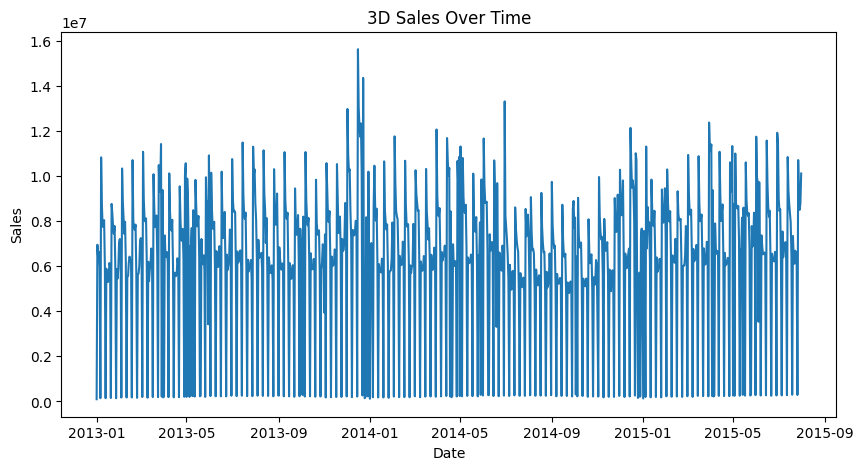

In [10]:
import matplotlib.pyplot as plt

# Create a temporary variable for 3D sales without modifying data
# Daily_sales = merged_train_data['Sales'].resample('D').sum()

# Time series plot of 3D sales
plt.figure(figsize=(10, 5))
plt.plot(daily_data['Date'], daily_data['Sales'])
plt.title('3D Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [11]:
Daily_sales = daily_data.copy()
Daily_sales.shape

(942, 20)

* Check whether your time Series Data is Stationary

In [12]:
# split data into 10 chunks
chunks = np.split(Daily_sales['Sales'], indices_or_sections=6)
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 6.13272e+06 | 9.63343e+12
    2 | 6.20977e+06 | 8.4025e+12
    3 | 6.60846e+06 | 1.11986e+13
    4 | 5.86296e+06 | 9.03552e+12
    5 | 5.97016e+06 | 9.14983e+12
    6 | 6.62472e+06 | 1.08083e+13


c:\Users\AII\Desktop\sales-forecasting\venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [13]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(Daily_sales['Sales'])
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -4.761614524595634
p-value: 6.436731330558783e-05


> Based on the ADF statistic and the very small p-value, the data is stationary. This means the mean, variance, and autocorrelation structure of the data are constant over time, and the data doesn't exhibit trends or seasonality that would make it non-stationary

* Check for autocorrelation and partial autocorrelation of your data

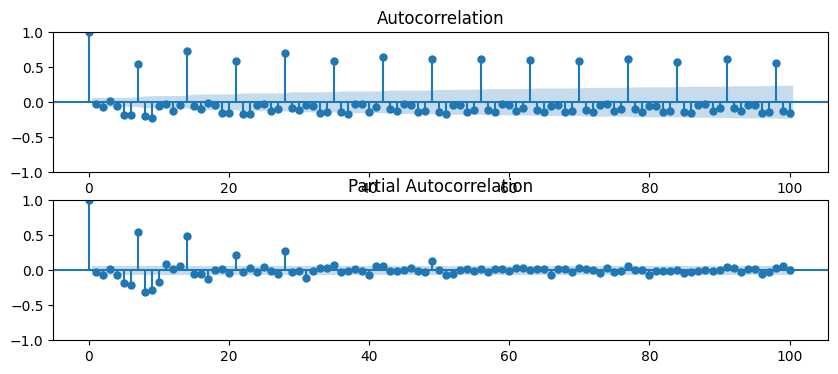

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(Daily_sales['Sales'],lags=100, ax=ax[0])
plot_pacf(Daily_sales['Sales'],lags=100, ax=ax[1])
plt.show()

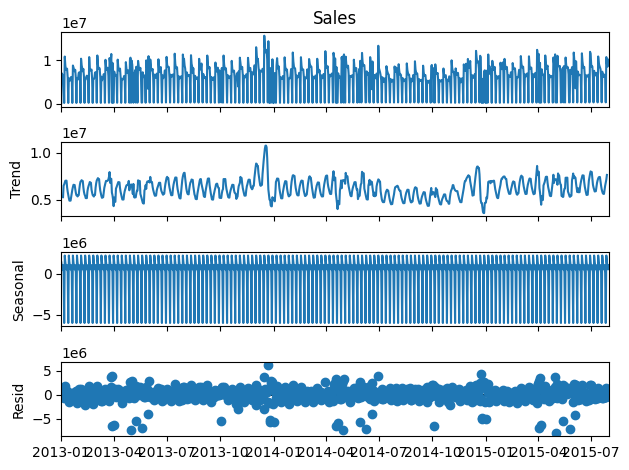

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

Daily_sales = Daily_sales.set_index('Date')
result = seasonal_decompose(Daily_sales['Sales'], model='additive')
result.plot()
plt.tight_layout()
plt.show()

* Transform the time series data into supervised learning data by creating a new y(target) column. For example, as illustrated here in the Sliding Window For Time Series Data section 

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()
daily_resampled_data = Daily_sales.copy()
# Apply label encoding to ordinal categorical columns
daily_resampled_data['StoreType'] = label_encoder.fit_transform(daily_resampled_data['StoreType'])
daily_resampled_data['Assortment'] = label_encoder.fit_transform(daily_resampled_data['Assortment'])
daily_resampled_data['StateHoliday'] = label_encoder.fit_transform(daily_resampled_data['StateHoliday'])

daily_resampled_data.head()

,year,month,day,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Sales
Date,,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,1,2,19491,0,0,1,1,0,0,5395.170557,9.0,2008.0,1,0.0,0.0,97235
2013-01-02,2013,1,2,1,3,834075,1,0,0,1,0,0,5390.358744,9.0,2008.0,1,0.0,0.0,6949829
2013-01-03,2013,1,3,1,4,761040,1,0,0,1,0,0,5390.358744,9.0,2008.0,1,0.0,0.0,6347820
2013-01-04,2013,1,4,1,5,782137,1,0,0,1,0,0,5390.358744,9.0,2008.0,1,0.0,0.0,6638954
2013-01-05,2013,1,5,1,6,687472,1,0,0,1,0,0,5390.358744,9.0,2008.0,1,0.0,0.0,5951593


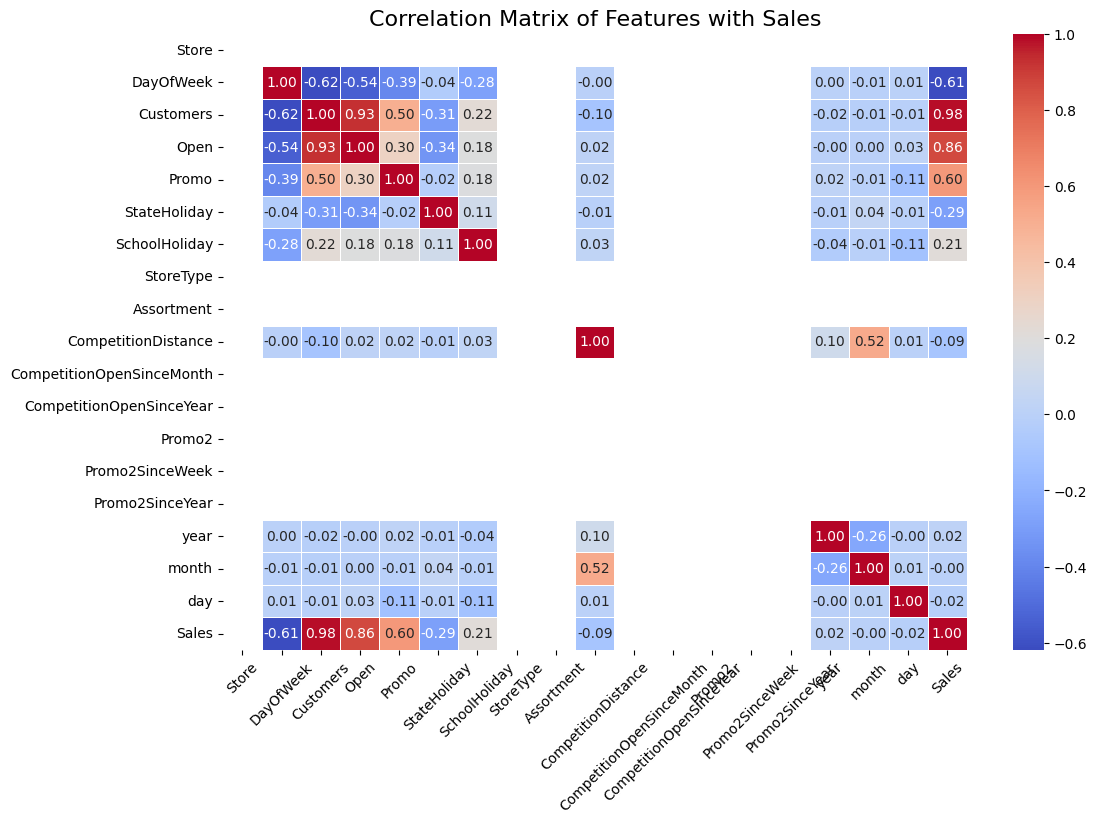

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your aggregated daily data is in 'daily_data'

# Select only the numeric columns for correlation analysis
numeric_columns = ['Store', 'DayOfWeek', 'Customers','Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'day', 'Sales']

# Calculate the correlation matrix
correlation_matrix = daily_resampled_data[numeric_columns].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix of Features with Sales', size=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()


In [132]:
daily_resampled_data = daily_resampled_data[['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                                             'CompetitionDistance',  'Sales']]
daily_resampled_data.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Sales
Date,,,,,,,
2013-01-01,2,0,0,1,1,5395.170557,97235
2013-01-02,3,1,0,0,1,5390.358744,6949829
2013-01-03,4,1,0,0,1,5390.358744,6347820
2013-01-04,5,1,0,0,1,5390.358744,6638954
2013-01-05,6,1,0,0,1,5390.358744,5951593


In [152]:
# Split data into train-val-test
# ==============================================================================
# end_train = '2010-12-02'
n_train_weeks = 754
data_train = daily_resampled_data[:n_train_weeks]
data_test = daily_resampled_data[n_train_weeks:]

print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()}   "
    f"(n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}   "
    f"(n={len(data_test)})"
)

Train dates : 2013-01-01 00:00:00 --- 2015-01-24 00:00:00   (n=754)
Test dates  : 2015-01-25 00:00:00 --- 2015-07-31 00:00:00   (n=188)


**Scale your data in the (-1, 1) range**

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1, 1))
train_data=scaler.fit_transform(np.array(data_train))
test_data=scaler.fit_transform(np.array(data_test))
#print(df_train)

**Transform the time series data into supervised learning data by creating a new**

In [154]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [155]:
# multivariate data preparation
from numpy import array
from numpy import hstack

in_seq1 = np.array(train_data[:,0])
in_seq2 = np.array(train_data[:,1])
in_seq3 = np.array(train_data[:,2])
in_seq4 = np.array(train_data[:,3])
in_seq5 = np.array(train_data[:,4])
in_seq6 = np.array(train_data[:,5])
out_seq = np.array(train_data[:,6])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
train_dataset = hstack((in_seq1, in_seq2, in_seq3,in_seq4, in_seq5, in_seq6,out_seq))

In [156]:
# multivariate data preparation
from numpy import array
from numpy import hstack

in_seq1 = np.array(test_data[:,0])
in_seq2 = np.array(test_data[:,1])
in_seq3 = np.array(test_data[:,2])
in_seq4 = np.array(test_data[:,3])
in_seq5 = np.array(test_data[:,4])
in_seq6 = np.array(test_data[:,5])
out_seq = np.array(test_data[:,6])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
test_dataset = hstack((in_seq1, in_seq2, in_seq3,in_seq4, in_seq5, in_seq6,out_seq))

In [157]:
n_steps_in, n_steps_out = 21, 1
# convert into input/output
X_train, y_train = split_sequences(train_dataset, n_steps_in, n_steps_out)
X_test, y_test = split_sequences(test_dataset, n_steps_in, n_steps_out)

In [161]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(y_test.shape)

(734, 21, 6)
(734, 1)
(168, 21, 6)
(168, 1)


(None, None, None, None)

In [163]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 6
n_seq = 1

X_train = X_train.reshape((X_train.shape[0], n_seq,1, n_steps_in, n_features))
X_test = X_test.reshape((X_test.shape[0], n_seq,1, n_steps_in, n_features))

**Build a single step LSTM Regression model to predict the next sale.**

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

# Reshape the data to match the input for LSTM layers
# Instead of (samples, n_seq, 1, n_steps_in, n_features), LSTM expects (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], n_steps_in, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps_in, n_features))

# define the LSTM model
model = Sequential()
model.add(LSTM(units=256, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dropout(0.01))
model.add(Dense(n_steps_out))  # Output layer
model.compile(optimizer='adam', loss='huber')
model.summary()

# fit network
import keras
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Fit model with training data
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=1, shuffle=False, callbacks=[stop_early])

# Make predictions using the test data
test_predict = model.predict(X_test)

# Evaluate the model using performance metrics
import math
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

mae = mean_absolute_error(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)
rmse = math.sqrt(mse)

# Print results
print("The model performance for test set:")
print('-' * 38)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'RMSE: {rmse}')


c:\Users\AII\Desktop\sales-forecasting\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 256)            │       269,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,569 (1.03 MB)

 Trainable params: 269,569 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0763 - val_loss: 0.0528
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0437 - val_loss: 0.0262
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0209 - val_loss: 0.0235
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0234 - val_loss: 0.0152
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0105 - val_loss: 0.0115
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0087 - val_loss: 0.0103
Epoch 10/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0078 - val_loss: 0.0109
Epoch 11/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0073 - val_loss: 0.0105
Epoch 12/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


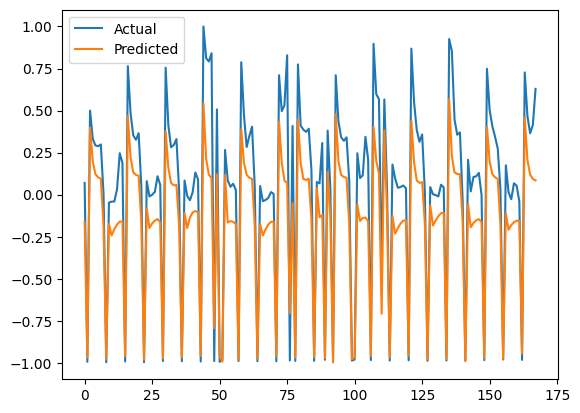

In [184]:
# Evaluate the model
# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Reshape y_test for comparison
y_test_flat = y_test.flatten()

# Optionally, you can plot actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(y_test_flat, label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.show()